In [ ]:
# Importar la clase del perceptrón multicapa, entrenamiento,matlab y numpy
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np


In [ ]:
# Si estámos usando Google Colab, debemos subir el archivo con:
from google.colab import files
uploaded = files.upload()

Saving resultados.csv to resultados.csv


In [ ]:
### IMPLEMENTACION DE FUNCIONES ###

#Funcion para impimir ldo datos de entrada y salida
def impimir_datos(X,Y):

  # Imprimir la lectura del archivo
  print("Forma de X:", X.shape)
  print("Forma de Y:", Y.shape)

  #Imprimir la Forma de lectura
  print("Datos de X:\n", X)
  print("Datos de Y:\n", Y)

# Funcion para Graficar los puntos de entrenamiento (rojo) y puntos estimados (azul), con el mismo dataset
def graficar_dispersion(resultado_y, prediccion_y):

  # plt.figure(figsize=(6, 6))
  plt.scatter(resultado_y, prediccion_y, color='blue')
  plt.plot([resultado_y.min(), resultado_y.max()], [resultado_y.min(), resultado_y.max()], color='red', linestyle='--')
  plt.title('Valencia: Real vs Predicho')
  plt.xlabel('Valor Real')
  plt.ylabel('Valor Predicho')
  plt.grid(True)
  plt.tight_layout()
  plt.show()

# Comparación real vs predicho
def comparar_predicciones(Y, Y_pred):
  print("=" * 50)
  print(f"\n📋 COMPARACIÓN: TODOS LOS DATOS DEL DATASET Y MLP")
  print("=" * 50)
  print(f"{'Registro':>12} {'Valencia (Real)':>17} {'Valencia (Pred)':>17}")
  print("-" * 50)

  for i in range(len(Y)):
      print(f"{i+1:>10} {Y[i]:>15.2f} {Y_pred[i]:>15.2f}")



# Dividir en entrenamiento y prueba 70% para entrenamiento, 30% para prueba
def train_test(X,Y,test_size=0.3):

  # Cada vez que ejecutes el código, los datos de entrenamiento y prueba pueden cambiar, porque la división se hace de forma aleatoria (random_state).
  # X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
  datasets = train_test_split(X,
                              Y,
                              test_size=test_size)

  X_train, X_test, y_train, y_test = datasets

  return X_train, X_test, y_train, y_test



In [ ]:
# Leer el archivo csv, despues de la cabecera y las columnas que vamos a utilizar
dataset = np.loadtxt('resultados.csv', delimiter=' ', skiprows=1, usecols=(2,3,4,6))

#para visualizar los datos como el archivo
np.set_printoptions(suppress=True, precision=16)

# Valores de entrada (time, risk, arrival)
X = dataset[:, 0:3]

#Valores de salida (valencia)
Y = dataset[:, 3]

# Normalizar datos
scaler_X = StandardScaler()
scaler_y = StandardScaler()

X_scaled = scaler_X.fit_transform(X)
Y_scaled = scaler_y.fit_transform(Y.reshape(-1, 1)).ravel()

#Llamar la funcion para mostrar datos
impimir_datos(X,Y)

Forma de X: (25, 3)
Forma de Y: (25,)
Datos de X:
 [[0.5255373137825703 0.6452670144837881 0.2768108646941967]
 [0.4984615284837905 0.6634833487600097 0.1982330127934191]
 [0.4846596000512216 0.9272238212895264 0.1449310118720613]
 [0.4581891361736128 0.8999651727342828 0.2728599727503848]
 [0.4595593475463711 0.868748699972358  0.2627338334810066]
 [0.4597135588354613 0.8667269593721654 0.2885390361195653]
 [0.458904671142526  0.8955263303423449 0.3041781438270339]
 [0.9219601121361245 0.7537132885032378 0.1712264503559322]
 [0.563977369645388  0.7477512837514338 0.1920699696342246]
 [0.6175550841412343 0.8764958567394897 0.0001956358704387]
 [0.536927344854439  0.7857077406717486 0.0476801322074746]
 [0.459167682928114  0.8651705018746499 0.1011079520794157]
 [0.453075232269415  0.9444322826768645 0.2750620579628524]
 [0.4399801697010422 0.9810597352117704 0.1981399600820706]
 [0.4548557836209679 0.9298478876940789 0.0479288326696608]
 [0.4348962916308707 0.8175859038955056 0.0975142

In [ ]:
# Crear el Perceptrón multicapa.

mlp = MLPRegressor(hidden_layer_sizes=(6,5,10),
                   activation='logistic',
                   solver='lbfgs', #Tecnica para encontrar los valores
                   learning_rate='constant',
                   max_iter=50000,
                   tol=0.000001 )

#Funcion para dividir el dataset en entrenamiento y prueba
# X_train, X_test, y_train, y_test = train_test(X,Y)
# mlp.fit(X_train, y_train)

#Entrenar la red neuronal para regresión.
# mlp.fit(X, Y)

mlp.fit(X_scaled, Y_scaled)
score = mlp.score(X_scaled, Y_scaled)
print(f"Modelo entrenado. Score de entrenamiento: {score:.4f}")

Modelo entrenado. Score de entrenamiento: 1.0000


[ 74.99896937052458    24.98446009119901    75.01004281321403
  99.94761317959433    74.9576501662243     50.10201166107531
  75.00155020952828     0.0007168849213173  49.987456963581124
   0.                   0.0273517072636267  50.00179641958964
  50.02522054443217    49.99302384404644    49.98724544738417
  75.03865771428724    74.96559280312411    99.99360900065571
  50.051931046473314   49.94518143939037     0.0217391304690935
  49.99066133391115   100.                  99.96491995393029
  99.91788838933554  ]
[ 75.  25.  75. 100.  75.  50.  75.   0.  50.   0.   0.  50.  50.  50.
  50.  75.  75. 100.  50.  50.   0.  50. 100. 100. 100.]


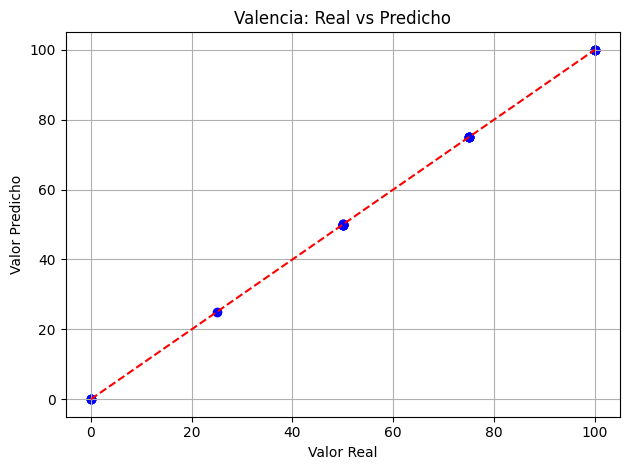

In [ ]:
### Pruebas de Entrenamiento ###
Y_pred_scaled = mlp.predict(X_scaled)
Y_pred = scaler_y.inverse_transform(Y_pred_scaled.reshape(-1, 1)).ravel()
Y_pred = np.clip(Y_pred, 0, 100)

#Imprimir puntos de prediccion
print(Y_pred)
#Imprimir puntos reales
print(Y)

#Funcion para graficar puntos de prediccion y reales
graficar_dispersion(Y, Y_pred)

In [ ]:
# Métricas de regresión
# Las métricas de regresión son medidas cuantitativas que se utilizan para evaluar el rendimiento de los modelos de regresión, los cuales predicen valores continuos.
from sklearn.metrics import r2_score
from sklearn.metrics import d2_absolute_error_score
from sklearn.metrics import d2_tweedie_score
from sklearn.metrics import median_absolute_error

# R2 score - Se utiliza para medir el ajuste de un modelo a los datos y su capacidad para predecir resultados futuros
# Es un número que va de 0 a 1 (o en porcentaje, de 0% a 100%) y nos dice qué tan bien sigue un fondo el comportamiento de su índice de referencia o benchmark
r2_score(Y, Y_pred)
print(f"R2 score: {r2_score(Y, Y_pred):.4f}")

# Mide el "coeficiente de determinación D²" basado en error absoluto, no cuadrático.
# d2_absolute_error_score es una alternativa más robusta a r2_score cuando te importa la precisión promedio, no los errores extremos.
score_d2abs = d2_absolute_error_score(Y, Y_pred)
print(f"D² basado en error absoluto: {score_d2abs:.4f}")

# pensada para evaluar modelos que siguen una distribución Tweedie
print("D² (power=0):", d2_tweedie_score(Y, Y_pred, power=0))

# Mide en promedio, Cuánto se equivoca mi modelo, sin importar si el error fue por arriba o por abajo
med = median_absolute_error(Y, Y_pred)
print("Mediana del error absoluto:", med)



R2 score: 1.0000
D² basado en error absoluto: 0.9990
D² (power=0): 0.9999986744468484
Mediana del error absoluto: 0.015539908800988655


In [ ]:
#Invocar la funcion para mostrar los resultados
comparar_predicciones(Y, Y_pred)



📋 COMPARACIÓN: TODOS LOS DATOS DEL DATASET Y MLP
    Registro   Valencia (Real)   Valencia (Pred)
--------------------------------------------------
         1           75.00           75.00
         2           25.00           24.98
         3           75.00           75.01
         4          100.00           99.95
         5           75.00           74.96
         6           50.00           50.10
         7           75.00           75.00
         8            0.00            0.00
         9           50.00           49.99
        10            0.00            0.00
        11            0.00            0.03
        12           50.00           50.00
        13           50.00           50.03
        14           50.00           49.99
        15           50.00           49.99
        16           75.00           75.04
        17           75.00           74.97
        18          100.00           99.99
        19           50.00           50.05
        20           50.00       

In [ ]:
from google.colab import files
uploaded2 = files.upload()

Saving mhernandez.csv to mhernandez (1).csv



🧪 Predicción usando otro archivo: datos_nuevos.csv
Forma de X: (16, 3)
Forma de Y: (16,)
Datos de X:
 [[0.5255373137825703 0.6452670144837881 0.2768108646941967]
 [0.4984615284837905 0.6634833487600097 0.1982330127934191]
 [0.4846596000512216 0.9272238212895264 0.1449310118720613]
 [0.4581891361736128 0.8999651727342828 0.2728599727503848]
 [0.4595593475463711 0.868748699972358  0.2627338334810066]
 [0.4597135588354613 0.8667269593721654 0.2885390361195653]
 [0.458904671142526  0.8955263303423449 0.3041781438270339]
 [0.4581891361736128 0.8999651727342828 0.2728599727503848]
 [0.9219601121361245 0.7537132885032378 0.1712264503559322]
 [0.563977369645388  0.7477512837514338 0.1920699696342246]
 [0.6175550841412343 0.8764958567394897 0.0001956358704387]
 [0.536927344854439  0.7857077406717486 0.0476801322074746]
 [0.4548557836209679 0.9298478876940789 0.0479288326696608]
 [0.4880997506452671 0.8912882879759056 0.0332173146366965]
 [0.5221268430225984 0.9330349050604748 0.028383957598960

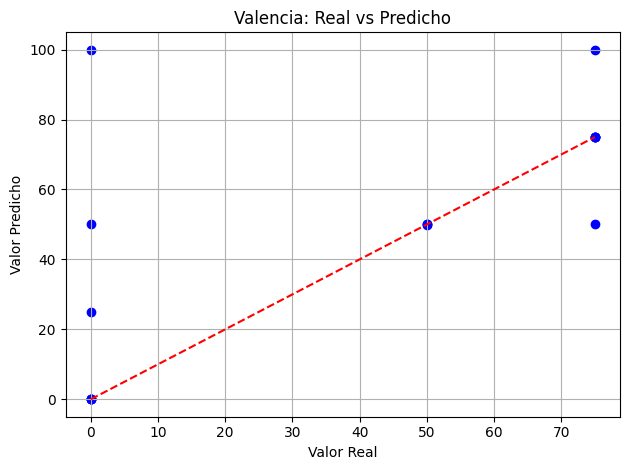

In [ ]:
# === PREDICCIÓN CON OTRO ARCHIVO NUEVO ===
print("\n🧪 Predicción usando otro archivo: datos_nuevos.csv")

# Leer columnas 2, 3, 4 del nuevo archivo (time, risk, arrival)
X_otro = np.loadtxt('mhernandez.csv', delimiter=' ', skiprows=1, usecols=(2, 3, 4,6))

db = X_otro[:, 0:3]
dby = X_otro[:, 3]

impimir_datos(db,dby)

# Normalizar usando el scaler del entrenamiento
X_otro_scaled = scaler_X.transform(db)

# Predecir
Y_otro_scaled = mlp.predict(X_otro_scaled)
Y_otro = scaler_y.inverse_transform(Y_otro_scaled.reshape(-1, 1)).ravel()

# Limitar entre 0 y 100
Y_otro = np.clip(Y_otro, 0, 100)

# Mostrar resultados
print("=" * 60)
print(f"{'Registro':>10} {'Time':>8} {'Risk':>8} {'Arrival':>10} {'Valencia Pred':>18}")
print("-" * 60)
for i, punto in enumerate(X_otro):
    print(f"{i+1:>10} {punto[0]:>8.2f} {punto[1]:>8.2f} {punto[2]:>10.2f} {dby[i]:>12.2f}{Y_otro[i]:>12.2f}")

graficar_dispersion(dby, Y_otro)